In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)
import xarray as xr
#xr.set_options(display_style='html');
#import shapefile
#import pygmt
#import requests
import geopandas as gpd
#from shapely.geometry import Point
#import os

In [2]:
from IPython import display
display.set_matplotlib_formats('retina')

In [3]:
data_dir = '/home/jovyan/data/bravoseis_data'

In [4]:
eqs = pd.read_csv(data_dir + '/noaa_hydroacoustic/seasick_output/eqs.csv',
                  sep=',',index_col='time')
eqs.head()
#convert to geopandas data frame
#convert utm dataframe epsg:utm code.
#

h_count   h_id  ep_lat  ep_lon  er_lat  er_lon  \
time                                                                      
2020-01-12 00:59:58.000      3.0    543 -61.484 -54.521   0.310   0.924   
2020-01-12 01:18:58.200      5.0  54321 -61.634 -52.338   0.326   1.277   
2020-01-12 01:36:58.200      3.0    543 -62.246 -57.490   0.467   1.517   
2020-01-12 02:08:05.000      3.0    543 -62.044 -58.270   0.140   0.043   
2020-01-12 03:06:36.400      5.0  65432 -61.622 -55.013   0.238   0.225   

                         er_time     mdb   mdb2 event  \
time                                                    
2020-01-12 00:59:58.000   39.226  200.92  201.2    EQ   
2020-01-12 01:18:58.200   49.447  218.23  218.6    EQ   
2020-01-12 01:36:58.200   62.145  190.35  190.6    EQ   
2020-01-12 02:08:05.000    9.413  188.79  189.0    EQ   
2020-01-12 03:06:36.400    2.563  192.34  192.6    EQ   

                                                                     notes  
time                                                                        
2020-01-12 00:59:58.000                   East of network... bad locatoin.  
2020-01-12 01:18:58.200  Show BOB Located North and East -61.6 -52.4 is...  
2020-01-12 01:36:58.200                      Possible rift East of Caldera  
2020-01-12 02:08:05.000                                          under KGI  
2020-01-12 03:06:36.400                   NE of KGI and Network. -61.6 -55

In [5]:
eqs['normalized'] = (eqs['mdb']/ eqs['mdb'].max())*50
eqs.head()

h_count   h_id  ep_lat  ep_lon  er_lat  er_lon  \
time                                                                      
2020-01-12 00:59:58.000      3.0    543 -61.484 -54.521   0.310   0.924   
2020-01-12 01:18:58.200      5.0  54321 -61.634 -52.338   0.326   1.277   
2020-01-12 01:36:58.200      3.0    543 -62.246 -57.490   0.467   1.517   
2020-01-12 02:08:05.000      3.0    543 -62.044 -58.270   0.140   0.043   
2020-01-12 03:06:36.400      5.0  65432 -61.622 -55.013   0.238   0.225   

                         er_time     mdb   mdb2 event  \
time                                                    
2020-01-12 00:59:58.000   39.226  200.92  201.2    EQ   
2020-01-12 01:18:58.200   49.447  218.23  218.6    EQ   
2020-01-12 01:36:58.200   62.145  190.35  190.6    EQ   
2020-01-12 02:08:05.000    9.413  188.79  189.0    EQ   
2020-01-12 03:06:36.400    2.563  192.34  192.6    EQ   

                                                                     notes  \
time                                                                         
2020-01-12 00:59:58.000                   East of network... bad locatoin.   
2020-01-12 01:18:58.200  Show BOB Located North and East -61.6 -52.4 is...   
2020-01-12 01:36:58.200                      Possible rift East of Caldera   
2020-01-12 02:08:05.000                                          under KGI   
2020-01-12 03:06:36.400                   NE of KGI and Network. -61.6 -55   

                         normalized  
time                                 
2020-01-12 00:59:58.000   43.723886  
2020-01-12 01:18:58.200   47.490860  
2020-01-12 01:36:58.200   41.423659  
2020-01-12 02:08:05.000   41.084175  
2020-01-12 03:06:36.400   41.856720

In [6]:
eqs.describe()

h_count           h_id     ep_lat     ep_lon     er_lat     er_lon  \
count  70.000000      70.000000  70.000000  70.000000  70.000000  70.000000   
mean    3.871429   77166.100000 -62.287714 -57.751329   0.235700   0.355000   
std     1.115392  179946.358446   1.904895   2.544067   0.507682   0.654673   
min     3.000000     123.000000 -71.907000 -64.307000   0.006000   0.004000   
25%     3.000000     432.000000 -62.763000 -58.912750   0.027500   0.028250   
50%     3.000000     608.500000 -62.396500 -57.755500   0.052000   0.065500   
75%     5.000000   39881.000000 -62.143500 -57.033500   0.169000   0.248500   
max     6.000000  654321.000000 -55.198000 -50.081000   2.993000   3.134000   

         er_time         mdb        mdb2  normalized  
count  70.000000   70.000000   70.000000   70.000000  
mean   15.776086  194.079286  194.311429   42.235221  
std    28.600132    9.391853    9.451885    2.043840  
min     0.087000  177.920000  177.900000   38.718663  
25%     1.050250  188.880000  189.100000   41.103760  
50%     3.251000  193.000000  193.150000   42.000348  
75%    10.261750  197.352500  197.600000   42.947532  
max    99.999000  229.760000  230.100000   50.000000

In [7]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(eqs['ep_lon'], eqs['ep_lat'])]
gdf = gpd.GeoDataFrame(eqs,geometry=geometry, crs='epsg:'+ '4326')

In [8]:
import math
def lon_lat_to_utm_epsg_code(lon, lat):
    """
    Function to retrieve local UTM EPSG code from WGS84 geographic coordinates.
    """
    utm_band = str((math.floor((lon + 180) / 6 ) % 60) + 1)
    if len(utm_band) == 1:
        utm_band = '0'+utm_band
    if lat >= 0:
        epsg_code = '326' + utm_band
    else:
        epsg_code = '327' + utm_band
    return epsg_code

In [9]:
epsg_code= lon_lat_to_utm_epsg_code(-60,-70)

### Mapping eq data
Let's make some maps just because we can.

In [10]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import numpy as np
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

(221288.77024763194, 778711.2297523699, 2782220.9087680364, 3338046.9594550906)


<GeoAxesSubplot:title={'center':'Eqs'}>

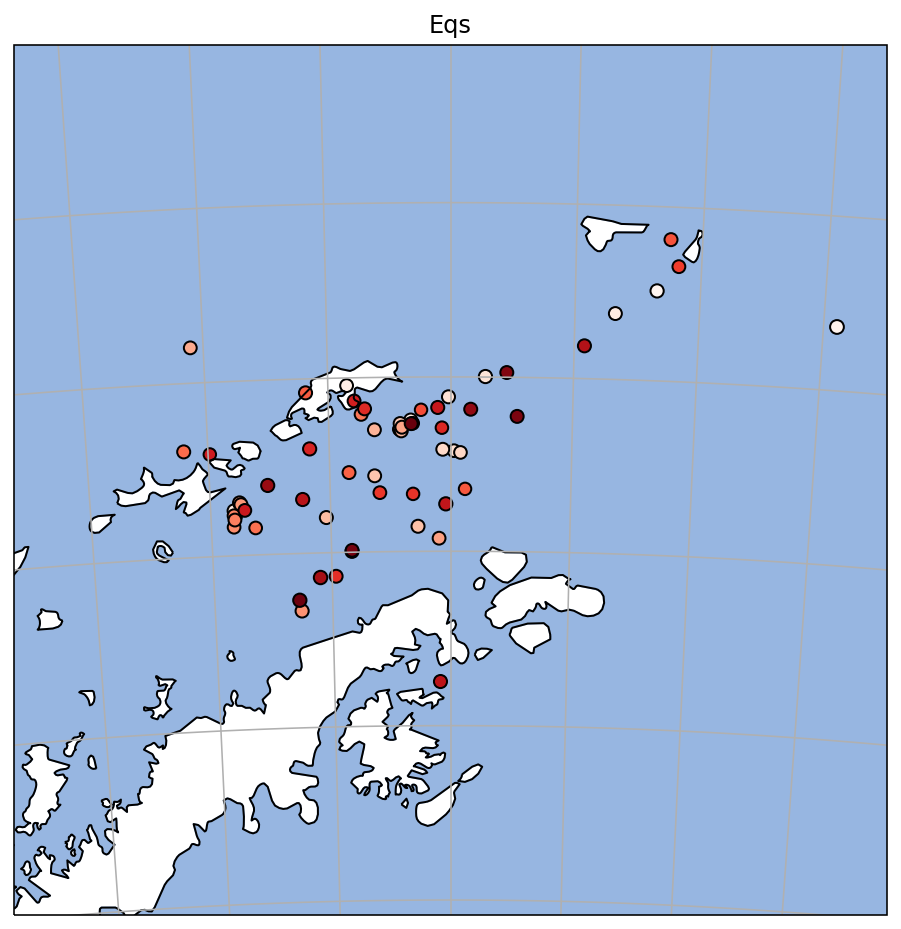

In [11]:
ax = plt.axes(projection=ccrs.UTM(21, southern_hemisphere=True, globe=None))
extent = [-62 ,-52, -65, -60]
ax.set_extent(extent)
ax.gridlines()
ax.set_title('Eqs');
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
#sc = ax.scatter(eqs.ep_lon, eqs.ep_lat,
#                c=eqs.mdb, s=40,
#                edgecolor='k', cmap='Reds',
#               transform=ccrs.UTM(21, southern_hemisphere=True, globe=None))
#plt.colorbar(sc, label='magnitude')

print(ax.get_extent())
gdf.to_crs('epsg:' + epsg_code).plot(ax=ax, c=eqs.mdb, edgecolor='k', cmap='Reds',
                                    markersize=(eqs.normalized))


# Scratch

In [12]:
import xarray as xr
import hvplot.xarray
import hvplot.pandas

In [13]:
url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/srtm30plus_v6'

In [14]:
ds = xr.open_dataset(url)

In [15]:
ds

<xarray.Dataset>
Dimensions:           (lat: 21600, lon: 43200)
Coordinates:
  * lon               (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat               (lat) float64 90.0 89.99 89.98 ... -89.97 -89.98 -89.99
Data variables:
    GDAL_Geographics  |S64 ...
    topo              (lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    AREA_OR_POINT:  Area
    title:          UCSD SRTM30_v6 Global DEM (30 sec)
    DODS.strlen:    0

In [16]:
ds_bran = ds.sel(lon=slice(-62 ,-52),lat = slice(-61, -65))

In [33]:
eq_plot1= ds_bran['topo'].hvplot(x='lon', y='lat', geo=True, rasterize=True) 

In [23]:
eq_plot1

:DynamicMap   []
   :Image   [lon,lat]   (topo)

In [22]:
gdf.head()

h_count   h_id  ep_lat  ep_lon  er_lat  er_lon  \
time                                                                      
2020-01-12 00:59:58.000      3.0    543 -61.484 -54.521   0.310   0.924   
2020-01-12 01:18:58.200      5.0  54321 -61.634 -52.338   0.326   1.277   
2020-01-12 01:36:58.200      3.0    543 -62.246 -57.490   0.467   1.517   
2020-01-12 02:08:05.000      3.0    543 -62.044 -58.270   0.140   0.043   
2020-01-12 03:06:36.400      5.0  65432 -61.622 -55.013   0.238   0.225   

                         er_time     mdb   mdb2 event  \
time                                                    
2020-01-12 00:59:58.000   39.226  200.92  201.2    EQ   
2020-01-12 01:18:58.200   49.447  218.23  218.6    EQ   
2020-01-12 01:36:58.200   62.145  190.35  190.6    EQ   
2020-01-12 02:08:05.000    9.413  188.79  189.0    EQ   
2020-01-12 03:06:36.400    2.563  192.34  192.6    EQ   

                                                                     notes  \
time                                                                         
2020-01-12 00:59:58.000                   East of network... bad locatoin.   
2020-01-12 01:18:58.200  Show BOB Located North and East -61.6 -52.4 is...   
2020-01-12 01:36:58.200                      Possible rift East of Caldera   
2020-01-12 02:08:05.000                                          under KGI   
2020-01-12 03:06:36.400                   NE of KGI and Network. -61.6 -55   

                         normalized                     geometry  
time                                                              
2020-01-12 00:59:58.000   43.723886  POINT (-54.52100 -61.48400)  
2020-01-12 01:18:58.200   47.490860  POINT (-52.33800 -61.63400)  
2020-01-12 01:36:58.200   41.423659  POINT (-57.49000 -62.24600)  
2020-01-12 02:08:05.000   41.084175  POINT (-58.27000 -62.04400)  
2020-01-12 03:06:36.400   41.856720  POINT (-55.01300 -61.62200)

In [28]:
len(gdf)

70

In [66]:
eqsub = eqs_sub.hvplot.points(x='ep_lon', y='ep_lat', geo=True, hover_cols =['mdb2', 'normalized'],
                              color = "mdb2", cmap = 'colorwheel', s= "normalized",tiles ='ESRI')

In [51]:
import geoviews as gv

In [54]:
dir(gv.tile_sources)

['CartoDark',
 'CartoEco',
 'CartoLight',
 'CartoMidnight',
 'ESRI',
 'EsriImagery',
 'EsriNatGeo',
 'EsriOceanBase',
 'EsriOceanReference',
 'EsriReference',
 'EsriTerrain',
 'EsriUSATopo',
 'OSM',
 'StamenLabels',
 'StamenTerrain',
 'StamenTerrainRetina',
 'StamenToner',
 'StamenTonerBackground',
 'StamenWatercolor',
 'WMTS',
 'Wikipedia',
 '_ATTRIBUTIONS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'tile_sources']

In [67]:
eqsub

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [ep_lon,ep_lat]   (mdb2,normalized)

In [25]:
cond1 = eqs["ep_lat"] < -60    
cond2 = eqs["ep_lat"] > -65
cond3 = eqs["ep_lon"] > -62
cond4 = eqs["ep_lon"] < -52

eqs_sub = eqs[cond1 & cond2 & cond3 & cond4]

In [ ]:
ds_bran['topo'].hvplot(x='lon', y='lat', geo=True, rasterize=True, projection=ccrs.UTM(21, southern_hemisphere=True, globe=None))* eqs_sub.hvplot.points(x='ep_lon',
                y='ep_lat', geo=True, rasterize = True,
                  color='index', cmap='colorwheel',
                  projection=ccrs.UTM(21, southern_hemisphere=True, globe=None))  


In [ ]:
from geoviews.tile_sources import EsriImagery
topts = dict(width=700, height=600, bgcolor='black', xaxis=None, yaxis=None, show_grid=False)
tiles = EsriImagery.clone(ccrs=ccrs.GOOGLE_MERCATOR)

# Scratch 2 

In [ ]:
import urllib2

In [ ]:
import datetime as dt
from io import BytesIO

import numpy as np
import pandas as pd
import holoviews as hv

from matplotlib.image import imread
from mpl_toolkits.basemap import Basemap

hv.notebook_extension('bokeh', width=90)